In [1]:
import keras

In [2]:
# Cargar el conjunto de datos
mnist = keras.datasets.mnist

In [3]:
# Cargar la división de entrenamiento y prueba del conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


label: 0
image: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 

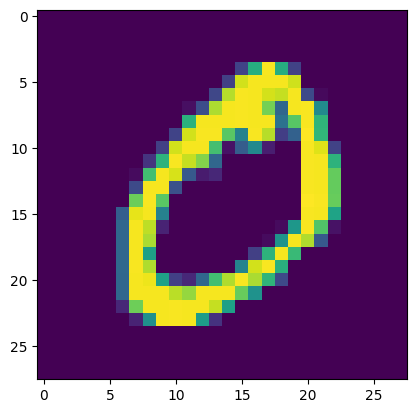

In [4]:
# Visualización de una muestra
import numpy as np
import matplotlib.pyplot as plt
# se puede poner un valor entre 0 y 59999
index = 1
# Imprime la etiqueta y laimagen
np.set_printoptions(linewidth=320)
print(f'label: {train_labels[index]}')
print(f'image: \n {train_images[index]}')
# Visualiza la imagen
plt.imshow(train_images[index])

In [5]:
# Normalizar los valores de píxeles del tren y probar las imágenes
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
# Construir el modelo de clasificación
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [7]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2630 - accuracy: 0.9261 - val_loss: 0.1404 - val_accuracy: 0.9591
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1158 - accuracy: 0.9659 - val_loss: 0.0998 - val_accuracy: 0.9702
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0788 - accuracy: 0.9762 - val_loss: 0.0863 - val_accuracy: 0.9734
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0589 - accuracy: 0.9825 - val_loss: 0.0764 - val_accuracy: 0.9764
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0445 - accuracy: 0.9865 - val_loss: 0.0789 - val_accuracy: 0.9756
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0344 - accuracy: 0.9899 - val_loss: 0.0789 - val_accuracy: 0.9769
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0287 - accuracy: 0.9907 - val_loss: 0.0692 - val_accurac

<Axes: >

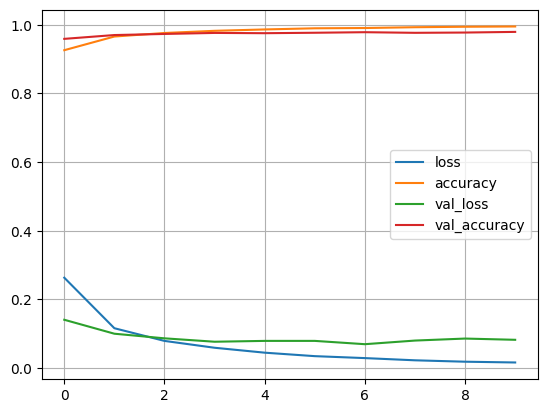

In [10]:
# Graficar el historial de entrenamiento:
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)

In [11]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(train_images, train_labels)
print(f'loss: {loss}')
print(f'accuracy: {accuracy}')
#

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0115 - accuracy: 0.9964
loss: 0.011511365883052349
accuracy: 0.9964333176612854


In [12]:
# Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'loss: {loss}')
print(f'accuracy: {accuracy}')
#

313/313 [==============================] - 1s 2ms/step - loss: 0.0820 - accuracy: 0.9794
loss: 0.08203747868537903
accuracy: 0.9793999791145325
